# 댓글 자연어처리 및 감성분석

#### 1. 필요한 라이브러리 및 파일 불러오기

In [1]:
# 구글 드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
twitter = pd.read_csv('/content/데이터수집본(중복없음) (1).csv')

In [3]:
twitter

,Unnamed: 0,Unnamed: 0.1,ID,Text,Date,Key,duplicates
0,0,0,1556991811700240384,서울 되련님들도 뭣같고 오세이돈도 뭣같고 지옥런한 새끼도 뭣같고 산불 안보러간다고 ...,2022-08-09 13:12:30,산불 or 화재,360
1,1,1,1556991703256821761,RT @anna12285: @babylion0505 @free351 지겹게 이어지던...,2022-08-09 13:12:04,산불 or 화재,360
2,2,2,1556991657337552896,RT @envsha: 이번주 뉴스만 해도\n- 파키스탄 지난 5주간 폭우로 282명...,2022-08-09 13:11:53,산불 or 화재,360
3,3,3,1556991610772402176,RT @c2bwsjuhmEW3tbX: 이상 이천화재로 사람죽어갈때 경기도지사랑 떡볶...,2022-08-09 13:11:42,산불 or 화재,1614
4,4,4,1556991592782737410,"RT @ulttung: 재난에 닥치니 진짜 문재인대통령, 이낙연 총리님시절이 그리워...",2022-08-09 13:11:37,산불 or 화재,638
...,...,...,...,...,...,...,...
824,95409,1434,1557307563116740610,RT @serii812: #RT #FOLLOW\n초코에몽 부자돼서 이벤트 열어봐요 ...,2022-08-10 10:07:11+00:00,기타,4
825,95411,1436,1557307562512375810,"...진실을 밝혀 주셔서, 본인의 죄를 뒤집어쓰고 죽는 이가 없게 해 주셔서 진심으...",2022-08-10 10:07:10+00:00,기타,4
826,95412,1437,1557307561245904896,RT @GoldenChild: [💡] #골드니스 여러분!\n지금 바로 네이버 '#V...,2022-08-10 10:07:10+00:00,기타,4
827,95413,1438,1557307558905294850,RT @spring_is_428: 성규랑 동시대를 살고있어서 너무 다행이다,2022-08-10 10:07:10+00:00,기타,4


In [4]:
twitter= twitter[['Text']] 
twitter

,Text
0,서울 되련님들도 뭣같고 오세이돈도 뭣같고 지옥런한 새끼도 뭣같고 산불 안보러간다고 ...
1,RT @anna12285: @babylion0505 @free351 지겹게 이어지던...
2,RT @envsha: 이번주 뉴스만 해도\n- 파키스탄 지난 5주간 폭우로 282명...
3,RT @c2bwsjuhmEW3tbX: 이상 이천화재로 사람죽어갈때 경기도지사랑 떡볶...
4,"RT @ulttung: 재난에 닥치니 진짜 문재인대통령, 이낙연 총리님시절이 그리워..."
...,...
824,RT @serii812: #RT #FOLLOW\n초코에몽 부자돼서 이벤트 열어봐요 ...
825,"...진실을 밝혀 주셔서, 본인의 죄를 뒤집어쓰고 죽는 이가 없게 해 주셔서 진심으..."
826,RT @GoldenChild: [💡] #골드니스 여러분!\n지금 바로 네이버 '#V...
827,RT @spring_is_428: 성규랑 동시대를 살고있어서 너무 다행이다


#### 2. 한글 제외한 문자 제거

In [5]:
# import re 

In [6]:
# remove_except_ko = re.compile(r"[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]")

In [7]:
# '한글'을 제외한 다른 문자 모두 제거
import re 
# 파이썬에서는 정규 표현식을 지원하기 위해 re(regular expression) 모듈을 제공한다.
remove_except_ko = re.compile(r"[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]")
# re를 통해 모듈을 임포트 한뒤, re.compile('정규표현식')로 정규표현식을 불러온다.
# compile 함수는 문자열을 받은 후 이를 파이썬 코드로 반환해줌. (컴퓨터가 이해할 수 있도록)
# 정규표현식 '^' 는 시작되는 문자열 지정
# 가~힣 까지 검색 후 자음인 ㄱ~ㅎ 까지 검색 그 다음 모음인 ㅏ~ㅣ까지 탐색하며 한글만 전부 불러옴
# 한번에 ㄱ~힣 이런 식으로는 사용 불가
def preprocess(text):
    text = re.sub(remove_except_ko,' ',text).strip()
    return text
# re.sub 함수의 구성 : re.sub（정규 표현식, 치환 문자, 대상 문자열）
twitter['Text'] = twitter['Text'].map(lambda x : preprocess(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
twitter

,Text
0,서울 되련님들도 뭣같고 오세이돈도 뭣같고 지옥런한 새끼도 뭣같고 산불 안보러간다고 ...
1,지겹게 이어지던 산불 기억속에 가득하다
2,s 이번주 뉴스만 해도 파키스탄 지난 주간 폭우로 명 사망 미국...
3,s 이상 이천화재로 사람죽어갈때 경기도지사랑 떡볶이먹방찍고계셨던...
4,재난에 닥치니 진짜 문재인대통령 이낙연 총리님시절이 그리워죽겠음 그때 산불났을 때...
...,...
824,s 초코에몽 부자돼서 이벤트 열어봐요 트친들...
825,진실을 밝혀 주셔서 본인의 죄를 뒤집어쓰고 죽는 이가 없게 해 주셔서 진심으로 감...
826,골드니스 여러분 지금 바로 네이버 파티룸 에 놀러오세요 아래의 링크로...
827,s s 성규랑 동시대를 살고있어서 너무 다행이다


#### 3. OKT 토큰화와 필요없는 조사 제거

In [9]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 8.0 MB/s 
     |████████████████████████████████| 453 kB 75.6 MB/s 


In [10]:
from konlpy.tag import Okt
okt=Okt()
# mecab 사용해 토큰화, 한글자 제거, stop_word 제거
stop_word = ['께서','에서','이다','에게','으로','이랑','까지','부터','하다']
stopPos = ['Determiner','Adverb','Conjuctions','Josa','PreEomi','Eomi','Suffix',
          'Punctuation','Foreign','Alpha','Number','Unknown','KoreanParticle']
def token_okt(text):
    text = okt.pos(text)
    text = [i for i in text if len(i[0])>1]
    text = [i for i in text if i[0] not in stop_word]
    text = [i[0] for i in text if i[1] not in stopPos]
    return text

In [11]:
# 토큰화 + 토큰리스트 생성 
def make_tokens(df):
    df['tokens'] = ''
    tokens_list=[]
    for i, row in df.iterrows():
        if i%500==0:
            print(i,'/',len(df))
        token = token_okt(df['Text'][i])
        df['tokens'][i] = ' '.join(token)
    return df

twitter = make_tokens(twitter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0 / 829


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


500 / 829


In [12]:
len(twitter)

829

In [13]:
twitter

,Text,tokens
0,서울 되련님들도 뭣같고 오세이돈도 뭣같고 지옥런한 새끼도 뭣같고 산불 안보러간다고 ...,서울 되련 뭣같 이돈 뭣같 지옥런 새끼 뭣같 산불 보러 간다 했으면서 멀쩡한 컨트롤...
1,지겹게 이어지던 산불 기억속에 가득하다,지겹게 이어지던 산불 가득하다
2,s 이번주 뉴스만 해도 파키스탄 지난 주간 폭우로 명 사망 미국...,이번 뉴스 해도 파키스탄 지난 주간 폭우 사망 미국 켄터키주 폭우 사망 이란 폭우 ...
3,s 이상 이천화재로 사람죽어갈때 경기도지사랑 떡볶이먹방찍고계셨던...,이상 화재 사람 죽어 도지사 떡볶이 먹방 찍고계셨던 말씀 셨습
4,재난에 닥치니 진짜 문재인대통령 이낙연 총리님시절이 그리워죽겠음 그때 산불났을 때...,재난 닥치니 진짜 문재인 대통령 이낙연 총리 시절 그리워 죽겠음 그때 산불 났을 어...
...,...,...
824,s 초코에몽 부자돼서 이벤트 열어봐요 트친들...,초코 부자 돼서 이벤트 열어 봐요 트친 참여 가능하니깐 받아가요
825,진실을 밝혀 주셔서 본인의 죄를 뒤집어쓰고 죽는 이가 없게 해 주셔서 진심으로 감...,진실 밝혀 주셔서 본인 뒤집어 쓰고 죽는 없게 주셔서 진심 감사 드립니다
826,골드니스 여러분 지금 바로 네이버 파티룸 에 놀러오세요 아래의 링크로...,골드 니스 여러분 지금 바로 네이버 파티 놀러 오세요 아래 링크 들어와 주세요 어플...
827,s s 성규랑 동시대를 살고있어서 너무 다행이다,성규 동시 살고있어서 다행


In [14]:
# 빈칸 찾아내기
twitter.replace('', np.nan, inplace=True)
twitter.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Text      0
tokens    0
dtype: int64

In [15]:
#Null 값 없애기
twitter=twitter.dropna()
twitter.isnull().sum()

Text      0
tokens    0
dtype: int64

In [16]:
twitter.head(10)

,Text,tokens
0,서울 되련님들도 뭣같고 오세이돈도 뭣같고 지옥런한 새끼도 뭣같고 산불 안보러간다고 ...,서울 되련 뭣같 이돈 뭣같 지옥런 새끼 뭣같 산불 보러 간다 했으면서 멀쩡한 컨트롤...
1,지겹게 이어지던 산불 기억속에 가득하다,지겹게 이어지던 산불 가득하다
2,s 이번주 뉴스만 해도 파키스탄 지난 주간 폭우로 명 사망 미국...,이번 뉴스 해도 파키스탄 지난 주간 폭우 사망 미국 켄터키주 폭우 사망 이란 폭우 ...
3,s 이상 이천화재로 사람죽어갈때 경기도지사랑 떡볶이먹방찍고계셨던...,이상 화재 사람 죽어 도지사 떡볶이 먹방 찍고계셨던 말씀 셨습
4,재난에 닥치니 진짜 문재인대통령 이낙연 총리님시절이 그리워죽겠음 그때 산불났을 때...,재난 닥치니 진짜 문재인 대통령 이낙연 총리 시절 그리워 죽겠음 그때 산불 났을 어...
5,너희들의 메시아인 이재명이 대통령이었으면 달랐을까 재난 상황마다 꼴값을 떨었던 이...,너희 메시아 이재명 대통령 이었으면 달랐을까 재난 상황 꼴값 떨었던 이재명 판교 풍...
6,윤석열이 머 라고 했더 라 밤 시 울진 산불 이재민 찾아 ...,윤석열 울진 산불 재민 찾아 있더라도 헬기 타고 와야죠 다음 뉴스
7,s 년 속초 산불 때 속초시장이 전날 제주도여행을 떠났다가 당일 밤비행기...,속초 산불 속초시 전날 제주도 여행 떠났다가 당일 비행기 없어 다음 비행기 부랴부랴...
8,s 윤석열 폭우 출근 못함 비난하면서 이재명 쿠팡 화재 먹...,윤석열 폭우 출근 비난 하면서 이재명 쿠팡 화재 먹방 모른 이낙연 산불 재해 막은 ...
9,s 미드 뉴스룸에서 년전에 나온 장면 지금 탄소예산은 기가톤정도 남았...,미드 뉴스룸 년전 나온 장면 지금 탄소 예산 기가톤 정도 남았고 대기 이산화탄소 농...


In [17]:
twitter.to_csv(r'twitter_token.csv')

In [18]:
data = pd.read_csv(r'/content/twitter_token.csv')

In [19]:
data.head()

,Unnamed: 0,Text,tokens
0,0,서울 되련님들도 뭣같고 오세이돈도 뭣같고 지옥런한 새끼도 뭣같고 산불 안보러간다고 ...,서울 되련 뭣같 이돈 뭣같 지옥런 새끼 뭣같 산불 보러 간다 했으면서 멀쩡한 컨트롤...
1,1,지겹게 이어지던 산불 기억속에 가득하다,지겹게 이어지던 산불 가득하다
2,2,s 이번주 뉴스만 해도 파키스탄 지난 주간 폭우로 명 사망 미국...,이번 뉴스 해도 파키스탄 지난 주간 폭우 사망 미국 켄터키주 폭우 사망 이란 폭우 ...
3,3,s 이상 이천화재로 사람죽어갈때 경기도지사랑 떡볶이먹방찍고계셨던...,이상 화재 사람 죽어 도지사 떡볶이 먹방 찍고계셨던 말씀 셨습
4,4,재난에 닥치니 진짜 문재인대통령 이낙연 총리님시절이 그리워죽겠음 그때 산불났을 때...,재난 닥치니 진짜 문재인 대통령 이낙연 총리 시절 그리워 죽겠음 그때 산불 났을 어...


In [20]:
df_new = pd.DataFrame(data)

In [21]:
df_new = df_new[['tokens']]

In [22]:
df_new

,tokens
0,서울 되련 뭣같 이돈 뭣같 지옥런 새끼 뭣같 산불 보러 간다 했으면서 멀쩡한 컨트롤...
1,지겹게 이어지던 산불 가득하다
2,이번 뉴스 해도 파키스탄 지난 주간 폭우 사망 미국 켄터키주 폭우 사망 이란 폭우 ...
3,이상 화재 사람 죽어 도지사 떡볶이 먹방 찍고계셨던 말씀 셨습
4,재난 닥치니 진짜 문재인 대통령 이낙연 총리 시절 그리워 죽겠음 그때 산불 났을 어...
...,...
824,초코 부자 돼서 이벤트 열어 봐요 트친 참여 가능하니깐 받아가요
825,진실 밝혀 주셔서 본인 뒤집어 쓰고 죽는 없게 주셔서 진심 감사 드립니다
826,골드 니스 여러분 지금 바로 네이버 파티 놀러 오세요 아래 링크 들어와 주세요 어플...
827,성규 동시 살고있어서 다행


#### 4. 감정사전 불러오기

In [23]:
# neg_dict = pd.DataFrame(pd.read_csv(r'/content/drive/MyDrive/KnuSentiLex/neg_pol_word.txt', sep='\n', quoting=3,header=15))
# neg_dict.rename(columns={'극성 : 부정':'word'},inplace=True)
# neg_dict.head()

In [24]:
pos_dict = pd.DataFrame(pd.read_csv(r'/content/pos_pol_word_단어추가.txt', sep='\n', quoting=3,header=15))
pos_dict.rename(columns={'극성 : 긍정':'word'},inplace=True)
pos_dict.head()

,word
0,멀쩡한
1,가득하다
2,그리워
3,바람직하지
4,깔깔


In [25]:
neg_dict = pd.DataFrame(pd.read_csv(r'/content/neg_pol_word_단어추가.txt', sep='\n', quoting=3,header=14))
neg_dict.rename(columns={'극성 : 부정':'word'},inplace=True)
neg_dict.head()

,word
0,지옥런
1,새끼
2,산불
3,버리고
4,침수


In [26]:
bad_dict = pd.DataFrame(pd.read_csv(r'/content/욕설 사전.txt',sep='\n',quoting=3,header=None))
bad_dict.rename(columns={0:'word'},inplace=True)
bad_dict.head()

,word
0,뭣같음
1,지랄
2,개뿔
3,슈펄
4,디질것


#### 5. 트윗의 Tone 측정하기

In [27]:
# tone_ls = []
# for doc in df_new['tokens']:
#     #print(doc.split())
#     #words=[]
#     #words.append(doc.split(' '))
#     splitdoc = doc.split()
#     pos=0
#     neg=0
#     for word in splitdoc:
#         if word in list(pos_dict['word']):
#             pos += 1
#         if word in list(neg_dict['word']):
#             neg += 1
#     if (pos+neg)!=0:
#         tone = (pos-neg)/(pos+neg)
#         if tone >0:
          
#           tone_ls.append(1)
#         elif tone <0:
          
#           tone_ls.append(-1)
#         elif tone ==0:
#           tone_ls.append(0)
#     else:
#         tone_ls.append(0)
# df_new['tone']= tone_ls

In [28]:
tone_ls = []
for doc in df_new['tokens']:
    #print(doc.split())
    #words=[]
    #words.append(doc.split(' '))
    splitdoc = doc.split()
    pos=0
    neg=0
    bad=1
    for word in splitdoc:
        if word in list(pos_dict['word']):
            pos += 1
        if word in list(neg_dict['word']):
            neg += 1
        if word in list(bad_dict['word']):
            bad = 0
    if bad == 0 :
        tone_ls.append(-3)            
    elif (pos+neg)!=0:
        tone = (pos-neg)/(pos+neg)
        if tone >0:
          
          tone_ls.append(1)
        elif (tone <0) & (tone >=-0.5) :
          
          tone_ls.append(-1)
        elif tone< -0.5:
          tone_ls.append(-2)  
        elif tone ==0:
          tone_ls.append(0)
    else:
        tone_ls.append(0)
df_new['tone']= tone_ls

In [29]:
df_new.head(10)

,tokens,tone
0,서울 되련 뭣같 이돈 뭣같 지옥런 새끼 뭣같 산불 보러 간다 했으면서 멀쩡한 컨트롤...,-3
1,지겹게 이어지던 산불 가득하다,-1
2,이번 뉴스 해도 파키스탄 지난 주간 폭우 사망 미국 켄터키주 폭우 사망 이란 폭우 ...,-2
3,이상 화재 사람 죽어 도지사 떡볶이 먹방 찍고계셨던 말씀 셨습,-2
4,재난 닥치니 진짜 문재인 대통령 이낙연 총리 시절 그리워 죽겠음 그때 산불 났을 어...,-2
5,너희 메시아 이재명 대통령 이었으면 달랐을까 재난 상황 꼴값 떨었던 이재명 판교 풍...,-2
6,윤석열 울진 산불 재민 찾아 있더라도 헬기 타고 와야죠 다음 뉴스,-2
7,속초 산불 속초시 전날 제주도 여행 떠났다가 당일 비행기 없어 다음 비행기 부랴부랴...,-2
8,윤석열 폭우 출근 비난 하면서 이재명 쿠팡 화재 먹방 모른 이낙연 산불 재해 막은 ...,-2
9,미드 뉴스룸 년전 나온 장면 지금 탄소 예산 기가톤 정도 남았고 대기 이산화탄소 농...,-2


In [30]:
df_new.to_csv(r'twitter_tone.csv')

In [31]:
df1=pd.read_csv(r'twitter_tone.csv')

In [32]:
df1.head(10)

,Unnamed: 0,tokens,tone
0,0,서울 되련 뭣같 이돈 뭣같 지옥런 새끼 뭣같 산불 보러 간다 했으면서 멀쩡한 컨트롤...,-3
1,1,지겹게 이어지던 산불 가득하다,-1
2,2,이번 뉴스 해도 파키스탄 지난 주간 폭우 사망 미국 켄터키주 폭우 사망 이란 폭우 ...,-2
3,3,이상 화재 사람 죽어 도지사 떡볶이 먹방 찍고계셨던 말씀 셨습,-2
4,4,재난 닥치니 진짜 문재인 대통령 이낙연 총리 시절 그리워 죽겠음 그때 산불 났을 어...,-2
5,5,너희 메시아 이재명 대통령 이었으면 달랐을까 재난 상황 꼴값 떨었던 이재명 판교 풍...,-2
6,6,윤석열 울진 산불 재민 찾아 있더라도 헬기 타고 와야죠 다음 뉴스,-2
7,7,속초 산불 속초시 전날 제주도 여행 떠났다가 당일 비행기 없어 다음 비행기 부랴부랴...,-2
8,8,윤석열 폭우 출근 비난 하면서 이재명 쿠팡 화재 먹방 모른 이낙연 산불 재해 막은 ...,-2
9,9,미드 뉴스룸 년전 나온 장면 지금 탄소 예산 기가톤 정도 남았고 대기 이산화탄소 농...,-2


In [33]:
df1

,Unnamed: 0,tokens,tone
0,0,서울 되련 뭣같 이돈 뭣같 지옥런 새끼 뭣같 산불 보러 간다 했으면서 멀쩡한 컨트롤...,-3
1,1,지겹게 이어지던 산불 가득하다,-1
2,2,이번 뉴스 해도 파키스탄 지난 주간 폭우 사망 미국 켄터키주 폭우 사망 이란 폭우 ...,-2
3,3,이상 화재 사람 죽어 도지사 떡볶이 먹방 찍고계셨던 말씀 셨습,-2
4,4,재난 닥치니 진짜 문재인 대통령 이낙연 총리 시절 그리워 죽겠음 그때 산불 났을 어...,-2
...,...,...,...
824,824,초코 부자 돼서 이벤트 열어 봐요 트친 참여 가능하니깐 받아가요,1
825,825,진실 밝혀 주셔서 본인 뒤집어 쓰고 죽는 없게 주셔서 진심 감사 드립니다,1
826,826,골드 니스 여러분 지금 바로 네이버 파티 놀러 오세요 아래 링크 들어와 주세요 어플...,0
827,827,성규 동시 살고있어서 다행,0


In [34]:
# list_a = list(map(float, list_a))

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidfv = TfidfVectorizer().fit(df_new['tokens'])
print(tfidfv.transform(df_new['tokens']).toarray())
print(tfidfv.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'서울': 2796, '되련': 1380, '뭣같': 2024, '이돈': 4055, '지옥런': 4900, '새끼': 2744, '산불': 2688, '보러': 2331, '간다': 82, '했으면서': 5867, '멀쩡한': 1828, '컨트롤': 5275, '타워': 5334, '버리고': 2256, '침수': 5238, '궁댕': 508, '뭉개': 2021, '있던': 4311, '뭣같음': 2025, '지겹게': 4859, '이어지던': 4105, '가득하다': 26, '이번': 4079, '뉴스': 1019, '해도': 5769, '파키스탄': 5443, '지난': 4867, '주간': 4748, '폭우': 5533, '사망': 2642, '미국': 2030, '켄터키주': 5289, '이란': 4060, '서부': 2789, '계속': 318, '번지': 2272, '작년': 4406, '도를': 1258, '찍고': 4993, '전소': 4542, '캐나다': 5258, '튼시': 5426, '올해': 3800, '이상': 4093, '화재': 5996, '사람': 2635, '죽어': 4796, '도지사': 1281, '떡볶이': 1545, '먹방': 1816, '찍고계셨던': 4994, '말씀': 1752, '셨습': 2873, '재난': 4478, '닥치니': 1090, '진짜': 4950, '문재인': 1991, '대통령': 1194, '이낙연': 4053, '총리': 5138, '시절': 3073, '그리워': 571, '죽겠음': 4791, '그때': 535, '났을': 859, '어떻게': 3471, '했냐': 5840, '다른': 1066, '거도': 2

In [37]:
# tokens_list = []
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(df_new['tokens'])
tokens_list=sp_matrix.toarray()
# for i in range(len(df_new['tokens'])):
#     tokens_list.append(vectorizer.fit_transform(df_new['tokens'][i]))

In [38]:
print(tokens_list)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
tokens_list.shape

(829, 6096)

In [40]:
type(tokens_list)

numpy.ndarray

In [41]:
len(tokens_list)

829

In [42]:
type(tokens_list)

numpy.ndarray

In [43]:
tokens_list.astype(float)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
type(tokens_list[0][0])

numpy.float64

In [45]:
token_list1=tokens_list.tolist()

In [46]:
type(token_list1)

list

In [47]:
# list_a = list(map(float, list_a))
# token_list1[0]=list(map(float,token_list1[0]))

In [48]:
# type(token_list1[300][0])

In [49]:
len(token_list1)

829

In [50]:
token_pd=pd.Series(token_list1)

In [51]:
df_new['vec']=token_pd

In [52]:
df_new.head()

,tokens,tone,vec
0,서울 되련 뭣같 이돈 뭣같 지옥런 새끼 뭣같 산불 보러 간다 했으면서 멀쩡한 컨트롤...,-3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,지겹게 이어지던 산불 가득하다,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,이번 뉴스 해도 파키스탄 지난 주간 폭우 사망 미국 켄터키주 폭우 사망 이란 폭우 ...,-2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,이상 화재 사람 죽어 도지사 떡볶이 먹방 찍고계셨던 말씀 셨습,-2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,재난 닥치니 진짜 문재인 대통령 이낙연 총리 시절 그리워 죽겠음 그때 산불 났을 어...,-2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [53]:
df_new.tail()

,tokens,tone,vec
824,초코 부자 돼서 이벤트 열어 봐요 트친 참여 가능하니깐 받아가요,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
825,진실 밝혀 주셔서 본인 뒤집어 쓰고 죽는 없게 주셔서 진심 감사 드립니다,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
826,골드 니스 여러분 지금 바로 네이버 파티 놀러 오세요 아래 링크 들어와 주세요 어플...,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
827,성규 동시 살고있어서 다행,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
828,사찬 천사 덕분 꽃숮 직관,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [54]:
# 가중치 반영

In [55]:
df_new.tail()

,tokens,tone,vec
824,초코 부자 돼서 이벤트 열어 봐요 트친 참여 가능하니깐 받아가요,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
825,진실 밝혀 주셔서 본인 뒤집어 쓰고 죽는 없게 주셔서 진심 감사 드립니다,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
826,골드 니스 여러분 지금 바로 네이버 파티 놀러 오세요 아래 링크 들어와 주세요 어플...,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
827,성규 동시 살고있어서 다행,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
828,사찬 천사 덕분 꽃숮 직관,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [56]:
df_new.tone=df_new.tone.astype(int)

In [57]:
df_new.dtypes

tokens    object
tone       int64
vec       object
dtype: object

In [59]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [60]:
X_train=df_new.vec[:700]
Y_train=df_new.tone[:700]

X_test=df_new.vec[700:]
Y_test=df_new.tone[700:]

In [61]:
max_len=1000
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (700, 1000)
X_test shape:  (129, 1000)


In [62]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

In [63]:
# Y_train = tf.keras.utils.to_categorical(Y_train)
# Y_test = tf.keras.utils.to_categorical(Y_test)


In [76]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.fit_transform(Y_test)

In [77]:
print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (700, 1000)
Y_train shape:  (700,)
X_test shape:  (129, 1000)
Y_test shape:  (129,)


In [78]:
df_new.dtypes

tokens    object
tone       int64
vec       object
dtype: object

In [66]:
# df_new['tone']=df_new['tone'].astype(float)

In [79]:
len(df_new['vec'][300])

6096

In [68]:
# 토큰 개수
# for i in range(len(df_new['vec'])):
#   if len(df_new['vec'][i]) != 6096:
#     print('문제발생')
 



In [121]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(1000, activation='tanh'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(5, activation='softmax'))

# optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [122]:
hist=model.fit(X_train,Y_train,batch_size=100, epochs=20,validation_data=(X_test, Y_test))

Epoch 1/20
7/7 [==============================] - 5s 495ms/step - loss: 1.6059 - accuracy: 0.2986 - val_loss: 1.6019 - val_accuracy: 0.2171
Epoch 2/20
7/7 [==============================] - 3s 366ms/step - loss: 1.5962 - accuracy: 0.3943 - val_loss: 1.5934 - val_accuracy: 0.2171
Epoch 3/20
7/7 [==============================] - 3s 365ms/step - loss: 1.5850 - accuracy: 0.3943 - val_loss: 1.5848 - val_accuracy: 0.2171
Epoch 4/20
7/7 [==============================] - 3s 366ms/step - loss: 1.5737 - accuracy: 0.3943 - val_loss: 1.5767 - val_accuracy: 0.2171
Epoch 5/20
7/7 [==============================] - 3s 364ms/step - loss: 1.5629 - accuracy: 0.3943 - val_loss: 1.5687 - val_accuracy: 0.2171
Epoch 6/20
7/7 [==============================] - 3s 368ms/step - loss: 1.5522 - accuracy: 0.3943 - val_loss: 1.5609 - val_accuracy: 0.2171
Epoch 7/20
7/7 [==============================] - 3s 366ms/step - loss: 1.5419 - accuracy: 0.3943 - val_loss: 1.5536 - val_accuracy: 0.2171
Epoch 8/20
7/7 [====

In [123]:
loss, acc = model.evaluate(X_test, Y_test, batch_size=32)

print('Test loss:', loss)
print('Test accuracy:', acc)

5/5 [==============================] - 0s 66ms/step - loss: 1.4854 - accuracy: 0.2171
Test loss: 1.4854477643966675
Test accuracy: 0.21705426275730133


5/5 [==============================] - 0s 63ms/step - loss: 1.4854 - accuracy: 0.2171

 정확도 : 0.2171


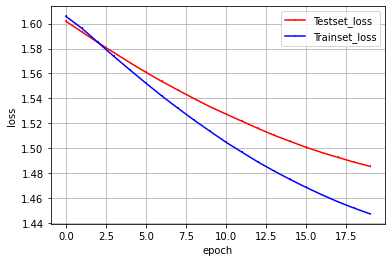

In [124]:
print("\n 정확도 : %.4f" % (model.evaluate(X_test, Y_test)[1]))

y_test_loss = hist.history['val_loss']
y_train_loss = hist.history['loss']

x_len = np.arange(len(y_test_loss))
plt.plot (x_len, y_test_loss, marker=',', c='red', label='Testset_loss')
plt.plot(x_len, y_train_loss, marker=',', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()




In [125]:
#word2vec
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 13.84 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-08-15 12:42:46--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::3403:4be7, 2406:da00:ff00::22cd:e0db, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://b

In [151]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-08-15 13:04:00--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-08-15 13:04:03--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc945f93be9d898bb427800d1a17.dl.dropboxusercontent.com/cd/0/get/BrBrBEde-33I9H9pGJv3AAmOfU_1KEmlckY30iOm_oDiranA8JqrUnmNPm2zLBqY-7wC9PYeuhLyZUOlEDMKflHrC9LN5Sjya3hTCdNlfogb7OPXFQG9_sz6IxvoJbPCgquY61V8tbR2CMpschD8EgbYsufLYn82VmjeRDyhfkNIz56ar78fduV_6DBlBJJyxFs/file?dl=1# [following]
--2022-08-15 13:04:04--  https://uc945f93be9d898bb427800d1a17.dl.dropboxusercontent.com/cd/0/g

In [127]:
!pwd

# Mecab-ko-for-Google-Colab 위치 확인 및 text 하위 폴더 생성, 데이터수집본.csv 파일 업로드

/content/Mecab-ko-for-Google-Colab


In [128]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [129]:
%ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_220429.sh


In [131]:
import os
import re

In [133]:
os.listdir('text')

['데이터수집본(중복없음) (1).csv']

In [134]:
mecab_text = pd.read_csv('/content/Mecab-ko-for-Google-Colab/text/데이터수집본(중복없음) (1).csv')

In [135]:
mecab_text

,Unnamed: 0,Unnamed: 0.1,ID,Text,Date,Key,duplicates
0,0,0,1556991811700240384,서울 되련님들도 뭣같고 오세이돈도 뭣같고 지옥런한 새끼도 뭣같고 산불 안보러간다고 ...,2022-08-09 13:12:30,산불 or 화재,360
1,1,1,1556991703256821761,RT @anna12285: @babylion0505 @free351 지겹게 이어지던...,2022-08-09 13:12:04,산불 or 화재,360
2,2,2,1556991657337552896,RT @envsha: 이번주 뉴스만 해도\n- 파키스탄 지난 5주간 폭우로 282명...,2022-08-09 13:11:53,산불 or 화재,360
3,3,3,1556991610772402176,RT @c2bwsjuhmEW3tbX: 이상 이천화재로 사람죽어갈때 경기도지사랑 떡볶...,2022-08-09 13:11:42,산불 or 화재,1614
4,4,4,1556991592782737410,"RT @ulttung: 재난에 닥치니 진짜 문재인대통령, 이낙연 총리님시절이 그리워...",2022-08-09 13:11:37,산불 or 화재,638
...,...,...,...,...,...,...,...
824,95409,1434,1557307563116740610,RT @serii812: #RT #FOLLOW\n초코에몽 부자돼서 이벤트 열어봐요 ...,2022-08-10 10:07:11+00:00,기타,4
825,95411,1436,1557307562512375810,"...진실을 밝혀 주셔서, 본인의 죄를 뒤집어쓰고 죽는 이가 없게 해 주셔서 진심으...",2022-08-10 10:07:10+00:00,기타,4
826,95412,1437,1557307561245904896,RT @GoldenChild: [💡] #골드니스 여러분!\n지금 바로 네이버 '#V...,2022-08-10 10:07:10+00:00,기타,4
827,95413,1438,1557307558905294850,RT @spring_is_428: 성규랑 동시대를 살고있어서 너무 다행이다,2022-08-10 10:07:10+00:00,기타,4


In [136]:
mecab_text= mecab_text[['Text']] 

In [137]:
mecab_text

,Text
0,서울 되련님들도 뭣같고 오세이돈도 뭣같고 지옥런한 새끼도 뭣같고 산불 안보러간다고 ...
1,RT @anna12285: @babylion0505 @free351 지겹게 이어지던...
2,RT @envsha: 이번주 뉴스만 해도\n- 파키스탄 지난 5주간 폭우로 282명...
3,RT @c2bwsjuhmEW3tbX: 이상 이천화재로 사람죽어갈때 경기도지사랑 떡볶...
4,"RT @ulttung: 재난에 닥치니 진짜 문재인대통령, 이낙연 총리님시절이 그리워..."
...,...
824,RT @serii812: #RT #FOLLOW\n초코에몽 부자돼서 이벤트 열어봐요 ...
825,"...진실을 밝혀 주셔서, 본인의 죄를 뒤집어쓰고 죽는 이가 없게 해 주셔서 진심으..."
826,RT @GoldenChild: [💡] #골드니스 여러분!\n지금 바로 네이버 '#V...
827,RT @spring_is_428: 성규랑 동시대를 살고있어서 너무 다행이다


In [138]:
# '한글'을 제외한 다른 문자 모두 제거
import re  
remove_except_ko = re.compile(r"[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]") 
def preprocess(text):
    text = re.sub(remove_except_ko,' ',text).strip()
    return text 
mecab_text['Text'] = mecab_text['Text'].map(lambda x : preprocess(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [139]:
mecab_text

,Text
0,서울 되련님들도 뭣같고 오세이돈도 뭣같고 지옥런한 새끼도 뭣같고 산불 안보러간다고 ...
1,지겹게 이어지던 산불 기억속에 가득하다
2,s 이번주 뉴스만 해도 파키스탄 지난 주간 폭우로 명 사망 미국...
3,s 이상 이천화재로 사람죽어갈때 경기도지사랑 떡볶이먹방찍고계셨던...
4,재난에 닥치니 진짜 문재인대통령 이낙연 총리님시절이 그리워죽겠음 그때 산불났을 때...
...,...
824,s 초코에몽 부자돼서 이벤트 열어봐요 트친들...
825,진실을 밝혀 주셔서 본인의 죄를 뒤집어쓰고 죽는 이가 없게 해 주셔서 진심으로 감...
826,골드니스 여러분 지금 바로 네이버 파티룸 에 놀러오세요 아래의 링크로...
827,s s 성규랑 동시대를 살고있어서 너무 다행이다


In [140]:
mecab_text.to_csv('./text/데이터수집본re.csv', encoding="utf8")

In [147]:
from tqdm import tqdm
from konlpy.tag import Mecab 

In [158]:
!pip install --upgrade pip
!pip install JPype1-0.5.7-cp27-none-win_amd64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 14.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: JPype1-0.5.7-cp27-none-win_amd64.whl is not a supported wheel on this platform.


In [170]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [172]:
# 형태소 분석기 Mecab을 사용하여 토큰화를 진행해보겠습니다.
mecab = Mecab()

Exception: ignored

In [161]:
import gensim

In [162]:
sentences = [[word for word in document.split()] for document in df_new['tokens']]

In [173]:
from gensim.models import Word2Vec
word_model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4, sg=0)

In [165]:
# word_model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4, sg=0)